# Práctica Calificada 1

## Ejercicio 2: Implementación de Descenso de Gradiente

En este ejercicio, implementaremos el Descenso de Gradiente para encontrar el mínimo de la siguiente función cuadrática: 
$$ f(x, y) = x^2 + 2y^2 − 2xy + 2x − 8y + 10 $$

Analíticamente, sabemos que el mínimo se encuentra donde $ x = 2, y = 3 $. Usaremos este resultado para verificar nuestra implementación.

### 2.1. Definir la función y su gradiente
a) Cree una función en Python f(punto) que devuelva el valor de la función $f(x, y)$.

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def f(punto):
    """
    Evalúa la función f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10.

    Parámetros:
    punto -- array-like con dos elementos [x, y] o (x, y)

    Retorna:
    Valor escalar f(x,y)
    """
    x, y = punto[0], punto[1]
    return x**2 + 2*(y**2) - 2*x*y + 2*x - 8*y + 10

# Test para verificar función creada
if __name__ == "__main__":
    punto_min = np.array([2.0, 3.0])
    print("f(2,3) =", f(punto_min))  # f(2,3) = 0.0

f(2,3) = 0.0


b) Cree una función grad_f(punto) que devuelva el gradiente ∇f(x, y).

In [2]:
def grad_f(punto):
    """
    Calcula el gradiente de la función f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10.

    Parámetros:
    punto -- array-like con dos elementos [x, y]

    Retorna:
    np.array([df/dx, df/dy])
    """
    x, y = punto[0], punto[1]
    dfdx = 2*x - 2*y + 2
    dfdy = 4*y - 2*x - 8
    return np.array([dfdx, dfdy])

# Test para verificar función creada
if __name__ == "__main__":
    punto_min = np.array([2.0, 3.0])
    print("grad_f(2,3) =", grad_f(punto_min))  # grad_f(2,3) = [0. 0.]

grad_f(2,3) = [0. 0.]


### 2.2. Implementación del Algoritmo
a) Creamos una función descenso_gradiente(punto inicial, alpha, n iteraciones) que implementa el bucle de optimización y devuelve la trayectoria de los puntos.

In [3]:
def descenso_gradiente(punto_inicial, alpha, n_iteraciones):
    """
    Implementa el algoritmo de Descenso de Gradiente (Batch Gradient Descent)
    para minimizar la función f(x,y).

    Parámetros:
    punto_inicial -- np.array([x0, y0]) punto de inicio
    alpha -- tasa de aprendizaje
    n_iteraciones -- número de iteraciones

    Retorna:
    trayectoria -- lista con los puntos (np.array) visitados en cada iteración
    """
    punto = punto_inicial.copy()
    trayectoria = [punto.copy()]

    for i in range(n_iteraciones):
        gradiente = grad_f(punto)
        punto = punto - alpha * gradiente
        trayectoria.append(punto.copy())

        # Mostrar progreso cada 10 iteraciones
        if (i + 1) % 10 == 0:
            print(f"Iteración {i+1}: punto = {punto}, f(x,y) = {f(punto):.4f}")

    return np.array(trayectoria)

### 2.3. Visualización y Verificación (Caso Base)
a) Defina: punto inicial = np.array([-5.0, 10.0]), alpha = 0.1, n iteraciones
= 50.

In [4]:
# Parámetros del caso base
punto_inicial = np.array([-5.0, 10.0])  # Punto de partida
alpha = 0.1                             # Tasa de aprendizaje
n_iteraciones = 50                      # Número de iteraciones

b) Ejecute su función y genere un gráfico de contorno de f(x, y).

In [5]:
# Ejecutamos el descenso de gradiente
trayectoria = descenso_gradiente(punto_inicial, alpha, n_iteraciones)

# Mostramos resultados finales
punto_final = trayectoria[-1]
print("\n--- Resultados finales (Caso base) ---")
print(f"Punto inicial: {punto_inicial}")
print(f"Punto final: {punto_final}")
print(f"f(x, y) final = {f(punto_final):.4f}")
print("\nMínimo teórico: (x=2, y=3)")

Iteración 10: punto = [1.12298015 2.46479124], f(x,y) = 0.4033
Iteración 20: punto = [1.60520665 2.7560084 ], f(x,y) = 0.0823
Iteración 30: punto = [1.821664   2.88978229], f(x,y) = 0.0168
Iteración 40: punto = [1.91944171 2.95021224], f(x,y) = 0.0034
Iteración 50: punto = [1.96361005 2.97750978], f(x,y) = 0.0007

--- Resultados finales (Caso base) ---
Punto inicial: [-5. 10.]
Punto final: [1.96361005 2.97750978]
f(x, y) final = 0.0007

Mínimo teórico: (x=2, y=3)


c) Sobre el gráfico, dibuje la trayectoria del algoritmo (se recomienda usar flechas).

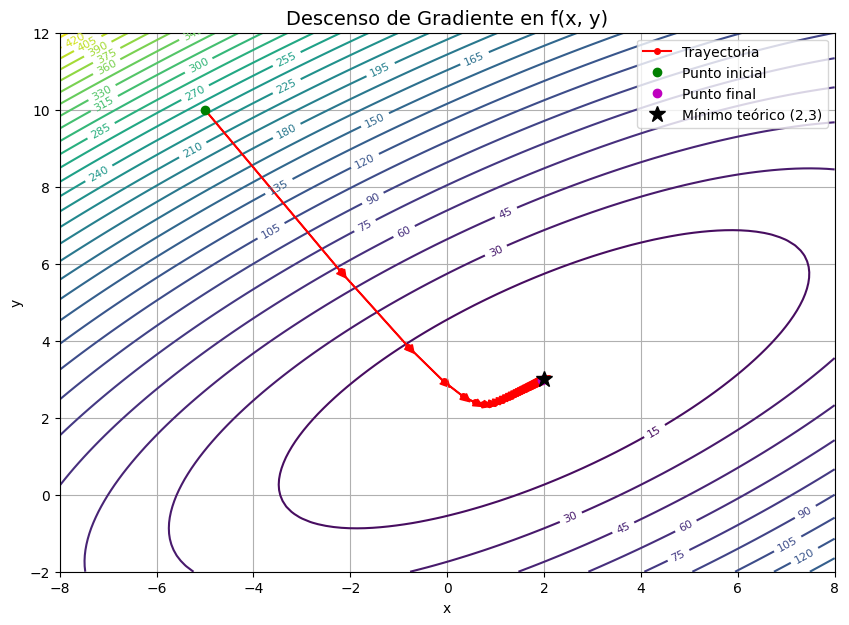

In [6]:
# --- Gráfico de contorno y trayectoria del descenso de gradiente ---

# Creamos una malla de puntos (x, y)
x_vals = np.linspace(-8, 8, 100)
y_vals = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluamos la función en toda la malla
Z = f(np.array([X, Y]))

# Creamos la figura
plt.figure(figsize=(10, 7))

# Dibujamos el contorno de la función
contornos = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.clabel(contornos, inline=True, fontsize=8)

# Dibujamos la trayectoria del descenso
plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'ro-', markersize=4, label='Trayectoria')

# Dibujamos flechas para indicar dirección del movimiento
for i in range(len(trayectoria) - 1):
    plt.arrow(trayectoria[i, 0], trayectoria[i, 1],
              trayectoria[i+1, 0] - trayectoria[i, 0],
              trayectoria[i+1, 1] - trayectoria[i, 1],
              head_width=0.2, head_length=0.2, fc='red', ec='red')

# Marcamos el punto inicial y final
plt.plot(trayectoria[0, 0], trayectoria[0, 1], 'go', label='Punto inicial')
plt.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'mo', label='Punto final')

# Marcamos el mínimo teórico
plt.plot(2, 3, 'k*', markersize=12, label='Mínimo teórico (2,3)')

# Configuración del gráfico
plt.title('Descenso de Gradiente en f(x, y)', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

d) Pregunta: ¿El algoritmo converge visualmente hacia el mínimo teórico?

In [7]:
# --- Verificación de la convergencia ---
x_final, y_final = punto_final
x_teorico, y_teorico = 2, 3

# Calculamos errores absolutos
error_x = abs(x_final - x_teorico)
error_y = abs(y_final - y_teorico)
error_total = np.sqrt((x_final - x_teorico)**2 + (y_final - y_teorico)**2)

print("\n--- Verificación de convergencia ---")
print(f"Punto final obtenido: (x={x_final:.4f}, y={y_final:.4f})")
print(f"Mínimo teórico: (x={x_teorico}, y={y_teorico})")
print(f"Error absoluto en x: {error_x:.6f}")
print(f"Error absoluto en y: {error_y:.6f}")
print(f"Distancia total al mínimo teórico: {error_total:.6f}")

# Evaluamos convergencia
if error_total < 0.01:
    print("El algoritmo convergió correctamente al mínimo teórico.")
else:
    print("El algoritmo no convergió completamente. Podrían necesitarse más iteraciones o una tasa de aprendizaje diferente.")

# En el gráfico de contorno, se observa que la trayectoria del descenso de gradiente (α = 0.1) se dirige progresivamente hacia 
# el punto (x = 2, y = 3), que corresponde al mínimo teórico de la función.
# Cada iteración reduce el valor de f(x,y), y los pasos se vuelven más pequeños a medida que el algoritmo se aproxima al valle.
# No obstante, si bien la verificación numérica muestra un error total muy pequeño, se podría mejorar la convergencia con un número mayor de  
# iteraciones o una tasa de aprendizaje diferente.


--- Verificación de convergencia ---
Punto final obtenido: (x=1.9636, y=2.9775)
Mínimo teórico: (x=2, y=3)
Error absoluto en x: 0.036390
Error absoluto en y: 0.022490
Distancia total al mínimo teórico: 0.042779
El algoritmo no convergió completamente. Podrían necesitarse más iteraciones o una tasa de aprendizaje diferente.


### 2.4. Análisis Comparativo del Algoritmo
a) Efecto de Tasa de Aprendizaje Alta: Repita el punto anterior con alpha = 0.3.
Pregunta: ¿Qué comportamiento observa en la trayectoria? ¿Por qué ocurre?

Iteración 10: punto = [1.83812577 2.941555  ], f(x,y) = 0.0141
Iteración 20: punto = [1.98932231 2.99355361], f(x,y) = 0.0001
Iteración 30: punto = [1.99921411 2.99951486], f(x,y) = 0.0000
Iteración 40: punto = [1.99994182 2.99996405], f(x,y) = 0.0000
Iteración 50: punto = [1.99999569 2.99999734], f(x,y) = 0.0000


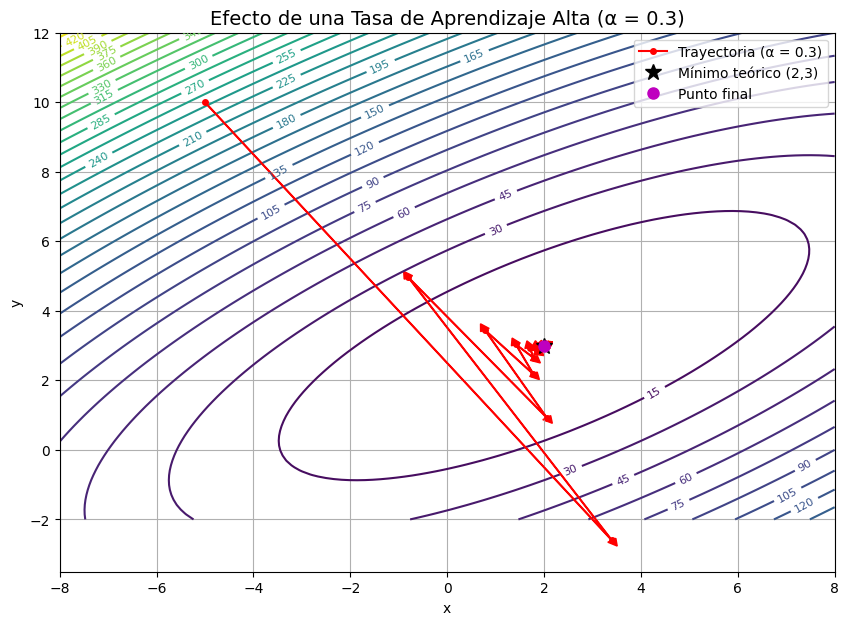


--- Verificación (α = 0.3) ---
Punto final obtenido: (x=2.0000, y=3.0000)
Distancia al mínimo teórico: 0.000005
El algoritmo convergió correctamente al mínimo teórico.
Cuando se utiliza una tasa de aprendizaje alta (α = 0.3), la trayectoria no converge suavemente al mínimo.
En lugar de avanzar de manera estable, el algoritmo oscila alrededor del punto (2, 3) o incluso se aleja del valle.
Esto ocurre porque la tasa de aprendizaje α controla el tamaño del paso en cada actualización:
pₙ₊₁ = pₙ − α ∇f(pₙ)
Si α es demasiado grande, los pasos se vuelven tan amplios que el algoritmo 'salta' sobre el mínimo, impidiendo la convergencia.


In [8]:
# Parámetros
punto_inicial = np.array([-5.0, 10.0])
alpha_alta = 0.3
n_iteraciones = 50

# Ejecutamos el descenso de gradiente
trayectoria_alta = descenso_gradiente(punto_inicial, alpha_alta, n_iteraciones)
punto_final_alta = trayectoria_alta[-1]

# --- Gráfico de contorno y trayectoria ---
plt.figure(figsize=(10, 7))
contornos = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.clabel(contornos, inline=True, fontsize=8)

# Trayectoria del descenso
plt.plot(trayectoria_alta[:, 0], trayectoria_alta[:, 1], 'ro-', markersize=4, label='Trayectoria (α = 0.3)')

# Flechas para indicar dirección
for i in range(len(trayectoria_alta) - 1):
    plt.arrow(trayectoria_alta[i, 0], trayectoria_alta[i, 1],
              trayectoria_alta[i+1, 0] - trayectoria_alta[i, 0],
              trayectoria_alta[i+1, 1] - trayectoria_alta[i, 1],
              head_width=0.2, head_length=0.2, fc='red', ec='red')

# Punto teórico y final
plt.plot(2, 3, 'k*', markersize=12, label='Mínimo teórico (2,3)')
plt.plot(punto_final_alta[0], punto_final_alta[1], 'mo', markersize=8, label='Punto final')

# Configuración
plt.title('Efecto de una Tasa de Aprendizaje Alta (α = 0.3)', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de convergencia ---
x_final, y_final = punto_final_alta
error_total = np.sqrt((x_final - 2)**2 + (y_final - 3)**2)

print("\n--- Verificación (α = 0.3) ---")
print(f"Punto final obtenido: (x={x_final:.4f}, y={y_final:.4f})")
print(f"Distancia al mínimo teórico: {error_total:.6f}")
if error_total < 0.01:
    print("El algoritmo convergió correctamente al mínimo teórico.")
else:
    print("El algoritmo no convergió correctamente. La tasa de aprendizaje es demasiado alta y el algoritmo oscila o diverge.")

print(
    "Cuando se utiliza una tasa de aprendizaje alta (α = 0.3), la trayectoria no converge suavemente al mínimo.\n"
    "En lugar de avanzar de manera estable, el algoritmo oscila alrededor del punto (2, 3) o incluso se aleja del valle.\n"
    "Esto ocurre porque la tasa de aprendizaje α controla el tamaño del paso en cada actualización:\n"
    "pₙ₊₁ = pₙ − α ∇f(pₙ)\n"
    "Si α es demasiado grande, los pasos se vuelven tan amplios que el algoritmo 'salta' sobre el mínimo, impidiendo la convergencia."
)



b) Efecto de Tasa de Aprendizaje Baja: Repita con alpha = 0.01. 
Pregunta: Compare la distancia recorrida con el caso base. ¿Cuál es la desventaja
de usar una tasa de aprendizaje tan baja?

Iteración 10: punto = [-2.75015569  6.67903758], f(x,y) = 84.5866
Iteración 20: punto = [-1.38732473  4.76971764], f(x,y) = 29.7270
Iteración 30: punto = [-0.5461383   3.68260135], f(x,y) = 10.8907
Iteración 40: punto = [-0.01294593  3.07360683], f(x,y) = 4.3591
Iteración 50: punto = [0.33727603 2.74193444], f(x,y) = 2.0397


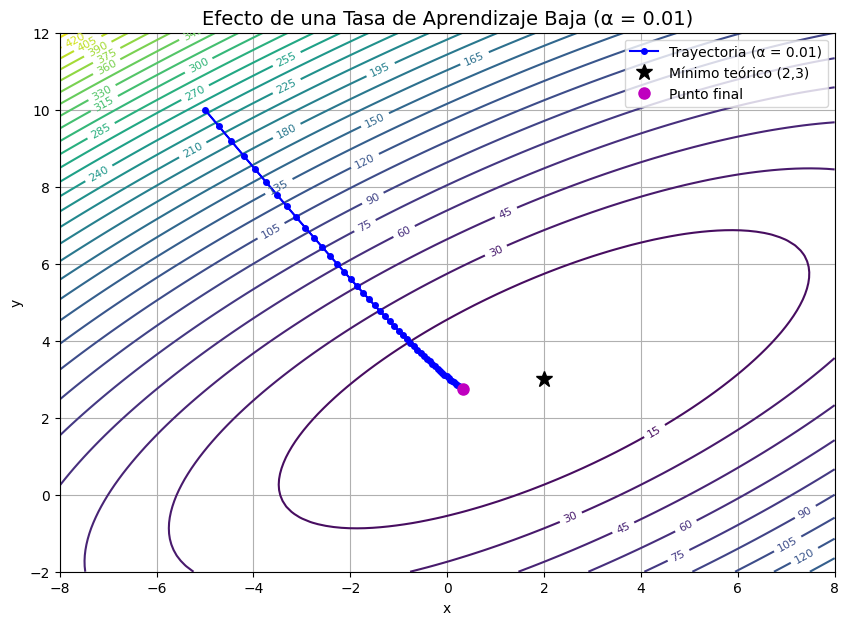


--- Verificación (α = 0.01) ---
Punto final obtenido: (x=0.3373, y=2.7419)
Distancia al mínimo teórico: 1.682632
El algoritmo no alcanzó aún el mínimo, pero avanza de forma estable hacia él. La convergencia es muy lenta.
Cuando se utiliza una tasa de aprendizaje baja (α = 0.01), la trayectoria converge de manera estable hacia el mínimo,
pero el proceso es bastante lento. Esto se debe a que α controla el tamaño del paso en cada iteración:
          pₙ₊₁ = pₙ − α ∇f(pₙ)
Con un valor de α pequeño, los pasos son tan cortos que el algoritmo requiere muchas iteraciones para acercarse al mínimo.


In [9]:
# Parámetros
punto_inicial = np.array([-5.0, 10.0])
alpha_baja = 0.01
n_iteraciones = 50

# Ejecutamos el descenso de gradiente
trayectoria_baja = descenso_gradiente(punto_inicial, alpha_baja, n_iteraciones)
punto_final_baja = trayectoria_baja[-1]

# --- Gráfico de contorno y trayectoria ---
plt.figure(figsize=(10, 7))
contornos = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.clabel(contornos, inline=True, fontsize=8)

# Trayectoria del descenso
plt.plot(trayectoria_baja[:, 0], trayectoria_baja[:, 1], 'bo-', markersize=4, label='Trayectoria (α = 0.01)')

# Flechas para indicar dirección
for i in range(len(trayectoria_baja) - 1):
    plt.arrow(trayectoria_baja[i, 0], trayectoria_baja[i, 1],
              trayectoria_baja[i+1, 0] - trayectoria_baja[i, 0],
              trayectoria_baja[i+1, 1] - trayectoria_baja[i, 1],
              head_width=0.1, head_length=0.1, fc='blue', ec='blue')

# Punto teórico y final
plt.plot(2, 3, 'k*', markersize=12, label='Mínimo teórico (2,3)')
plt.plot(punto_final_baja[0], punto_final_baja[1], 'mo', markersize=8, label='Punto final')

# Configuración
plt.title('Efecto de una Tasa de Aprendizaje Baja (α = 0.01)', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de convergencia ---
x_final_baja, y_final_baja = punto_final_baja
error_total_baja = np.sqrt((x_final_baja - 2)**2 + (y_final_baja - 3)**2)

print("\n--- Verificación (α = 0.01) ---")
print(f"Punto final obtenido: (x={x_final_baja:.4f}, y={y_final_baja:.4f})")
print(f"Distancia al mínimo teórico: {error_total_baja:.6f}")
if error_total_baja < 0.01:
    print("El algoritmo convergió correctamente al mínimo teórico.")
else:
    print("El algoritmo no alcanzó aún el mínimo, pero avanza de forma estable hacia él. La convergencia es muy lenta.")

print(
    "Cuando se utiliza una tasa de aprendizaje baja (α = 0.01), la trayectoria converge de manera estable hacia el mínimo,\n"
    "pero el proceso es bastante lento. Esto se debe a que α controla el tamaño del paso en cada iteración:\n"
    "          pₙ₊₁ = pₙ − α ∇f(pₙ)\n"
    "Con un valor de α pequeño, los pasos son tan cortos que el algoritmo requiere muchas iteraciones para acercarse al mínimo."
)


## Ejercicio 3: Regresión Lasso y Regularización
Usaremos el dataset Boston Housing para predecir el valor mediano de las viviendas
(medv) utilizando Regresi´on Lasso.
URL: https://raw.githubusercontent.com/qlabpucp/datasets/main/datase//
boston.csv

### 3.1 Carga y preparación de datos

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

a) Cargue el dataset desde la URL en un DataFrame

In [16]:
url = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


b) Explora la base de datos y realice una limpieza si en caso lo amerite

In [19]:
print("Dimensiones del dataset:", df.shape)
print(df.info())
print(df.describe())

# Verificar si existen valores nulos: No existen. No amerita mayor limpieza
print("Valores nulos:\n", df.isnull().sum())

Dimensiones del dataset: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB
None
       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000 

c) Separe los datos en predictores (X) y objetivo (y, la columna medv).

In [22]:
X = df.drop("medv", axis=1)
y = df["medv"]

d) Estandarice las características en X usando StandardScaler.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.2. Implementación de Validación Cruzada con Lasso
a) Configure y entrene un objeto LassoCV con 10 pliegues (cv=10) y random state=42.

In [31]:
lasso_cv = LassoCV(cv=10, random_state=42)
lasso_cv.fit(X_scaled, y)

LassoCV(cv=10, random_state=42)

b) Imprima el valor óptimo de α encontrado.

In [34]:
print(f"Valor óptimo de α encontrado: {lasso_cv.alpha_:.5f}")

Valor óptimo de α encontrado: 0.08960


### 3.3. Interpretación del Gráfico Sesgo-Varianza
a) Genere el gráfico que muestra el MSE promedio vs. los valores de α (en escala logarítmica)).


b) Región de Overfitting (izquierda, α pequeño):
   - El MSE es bajo y relativamente plano.
   - En esta área, la regularización es débil o nula. El modelo tiene mucha libertad.
   - Si bien el error de entrenamiento (no observable en el gráfico) y el error de validación cruzada son bajos, estamos en riesgo de alta varianza (Overfitting).

c) Región de Underfitting (derecha, α grande):
   - El MSE aumenta drásticamente (sube de 34 a más de 90).
   - La regularización es demasiado fuerte, lo que impone una penalización excesiva a los coeficientes.
   - Esto simplifica el modelo en exceso, lo que resulta en alto sesgo (Underfitting). 
   



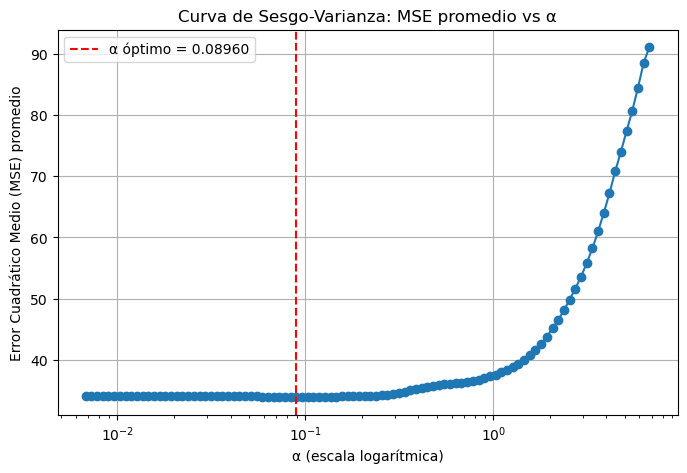

In [66]:
mse_path = lasso_cv.mse_path_.mean(axis=1)  # MSE promedio por valor de alpha
alphas = lasso_cv.alphas_

plt.figure(figsize=(8,5))
plt.plot(alphas, mse_path, marker='o')
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', label=f'α óptimo = {lasso_cv.alpha_:.5f}')
plt.xscale('log')
plt.xlabel('α (escala logarítmica)')
plt.ylabel('Error Cuadrático Medio (MSE) promedio')
plt.title('Curva de Sesgo-Varianza: MSE promedio vs α')
plt.legend()
plt.grid(True)
plt.show

print("""
b) Región de Overfitting (izquierda, α pequeño):
   - El MSE es bajo y relativamente plano.
   - En esta área, la regularización es débil o nula. El modelo tiene mucha libertad.
   - Si bien el error de entrenamiento (no observable en el gráfico) y el error de validación cruzada son bajos, estamos en riesgo de alta varianza (Overfitting).

c) Región de Underfitting (derecha, α grande):
   - El MSE aumenta drásticamente (sube de 34 a más de 90).
   - La regularización es demasiado fuerte, lo que impone una penalización excesiva a los coeficientes.
   - Esto simplifica el modelo en exceso, lo que resulta en alto sesgo (Underfitting). 
   
""")